In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


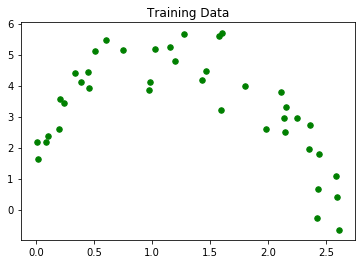

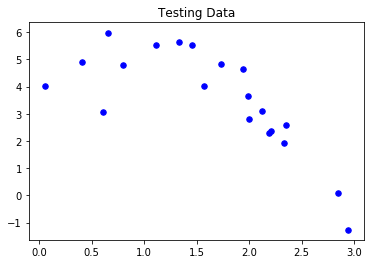

In [18]:
"""
# Load and plot data files
"""
# Load the training data hw1xtr.dat and hw1ytr.dat into the memory
train_features = pd.read_csv('xtr.dat',  header = None) 
train_desired_outputs = pd.read_csv('ytr.dat', header = None) 

# # Plot training_data and desired_outputs
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'g', marker = 'o', s = 30)
plt.title('Training Data')
plt.show()

# Load the test data hw1xte.dat and hw1yte.dat into the memory
test_features = pd.read_csv('xte.dat',  header = None) 
test_desired_outputs = pd.read_csv('yte.dat', header = None) 

# # Plot training_data and desired_outputs
plt.scatter(test_features.values, test_desired_outputs.values, color = 'b', marker = 'o', s = 30)
plt.title('Testing Data')
plt.show()


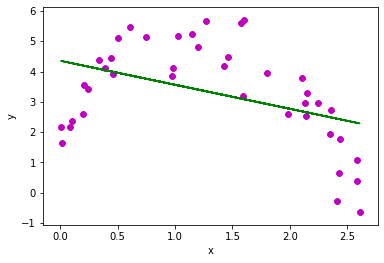

MSE on the training set:  2.1739455790492586


In [19]:
"""
# Train linear regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # Predicted response vector 
    global y_pred
    y_pred = b[0] + b[1]*x 
    
    # Plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # Function to show plot 
    plt.show() 

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)
plot_regression_line(train_features_vals, train_desired_outputs_vals, result)

# Find average error on the training set
A = np.square(y_pred - train_desired_outputs_vals)
error = np.sum(A)/N
print('MSE on the training set: ', error)



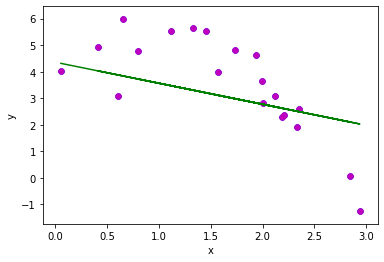

Average error on the testing set:  2.3118753456727985


In [20]:
"""
# Test linear regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred_test = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # Predicted response vector 
    global y_pred_test
    y_pred_test = b[0] + b[1]*x 
    
    # plotting the regression line 
    plt.plot(x, y_pred_test, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # Function to show plot 
    plt.show() 

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)

# Find average error on the training set
A = np.square(y_pred_test - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)



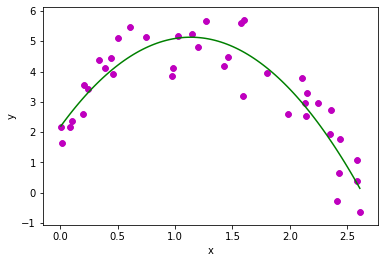

Average error on the training set:  0.4846845031271553


In [22]:
"""
# Train 2nd-order regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# # Plot scatter plot
# plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')     

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)
plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

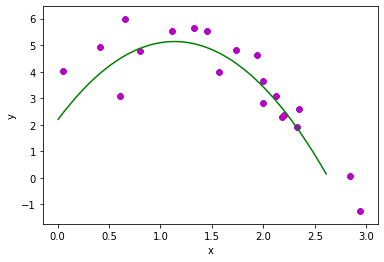

Average error on the testing set:  0.757363565551813
2nd-order polynomial regression is a better fit than linear regression.


In [6]:
"""
# Test 2nd-order regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)
plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('2nd-order polynomial regression is a better fit than linear regression.')


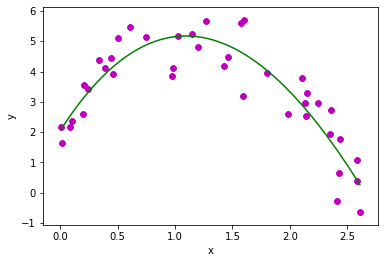

Average error on the training set:  0.48055213344532577


In [7]:
"""
# Train 3rd-order regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features), np.power(train_features, 3)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0]     
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[3]*np.power(train_features_vals, 3) + result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

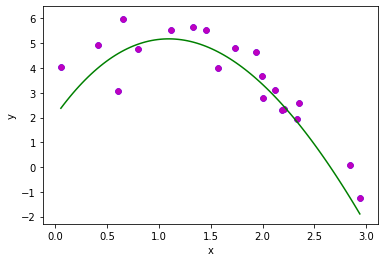

Average error on the testing set:  0.6911245362889507
3rd-order polynomial regression is a better fit than 2nd-order polynomial regression.


In [8]:
"""
# Test 3rd-order regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(test_features_vals.min(), test_features_vals.max(), 100)
    global y_pred
    y_pred = b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[3]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('3rd-order polynomial regression is a better fit than 2nd-order polynomial regression.')


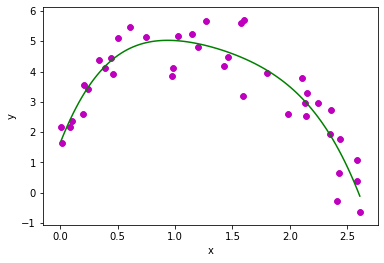

Average error on the training set:  0.43664763409971546


In [9]:
"""
# Train 4th-order regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features), np.power(train_features, 3), np.power(train_features, 4)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[4]* np.power(x_line, 4) + b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[4]*np.power(train_features_vals, 4) + result[3]*np.power(train_features_vals, 3) + result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

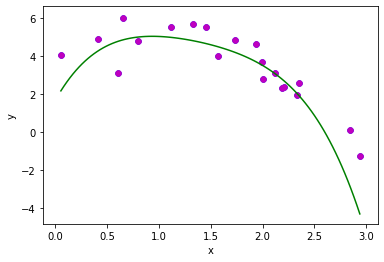

Average error on the testing set:  1.5584694832686972
Compared with all previous results, it appears that 3rd-order polynomial regression is the best for fitting the data.


In [10]:
"""
# Test 4th-order regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(test_features_vals.min(), test_features_vals.max(), 100)
    global y_pred
    y_pred = b[4]* np.power(x_line, 4) + b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')     

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[4]*np.power(test_features_vals, 4) + result[3]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('Compared with all previous results, it appears that 3rd-order polynomial regression is the best for fitting the data.')

